# <center> Projet </center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 BDA GR02 </center>
    <center> 22/12/2020 </center>
</div>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import numpy as np
import math
import time

## Programmer le Schéma de Crank-Nicholson pour un Call americain


### Initialisation des paramètres numériques et Financiers

In [3]:
M = 80        # Nombre de points de maillage d'actifs
N = 200        # Nombre de points de maillage en temps
Szero = 0      # valeur extreme
Smax = 150     # valeur extreme
omega = 1.2    # Paramètre SOR
tol = 0.001    # Paramètre SOR

S = 50         # Valeur du sous-jacent
K = 50         # Strike
r = 0.05       # Taux d'intérêt sans risque
sigma = 0.2    # Volatilité
delta = 0.02   # Dividende
T = 3          # Maturité

### Initialisation du maillage et construction de la matrice du système linéaire

In [4]:
u = np.zeros((N, M))

dS = Smax / M
dt = T/N
Smesh = np.arange(0, Smax, dS)
Tmesh = np.arange(T, 0, -dt)

u[0,:] = np.maximum(Smesh-K, 0)
u[:,0] = 0
u[:,M-1] = Smax

# calculer à la question 2:
def A(i):
    return 0.25 * (sigma**2) * (i**2) - (r - delta) * i / 2

def B(i):
    return 0.5 * (sigma**2) * (i**2) - (1 / dt) - r

def C(i):
    return 0.25 * (sigma**2) * (i**2) + (r - delta) * i / 2

Acoeffs = np.zeros((M,))
Bcoeffs = np.zeros((M,))
Ccoeffs = np.zeros((M,))

for i in range(M):
    Acoeffs[i] = A(i)
    Bcoeffs[i] = B(i)
    Ccoeffs[i] = C(i)
    
Tri = np.diag(Acoeffs[2:M], -1) + np.diag(Bcoeffs[1:M]) + np.diag(Ccoeffs[1:M-1], 1) 

In [5]:
for j in range(N-1):
    temp = np.zeros((M-2,))
    temp[0] = Acoeffs[0] * u[j+1][0]
    temp[M-3] = C(M) * u[j+1][M-1]
    RHS = u[j,1:M-1] - temp
    
    A = Tri
    b = RHS
    x = u[j,1:M-1]
    xold = 10000 * x
    n = len(x)
    
    while np.linalg.norm(xold - x) > tol:
        xold = x
        for i in range(n):
            if i == 0:
                z = (B(i) - A[i,i+1] * x[i+1]) / A[i,i]
                x[i] = np.maximum(omega * z + (1 - omega) * xold[i], i * dS - K)
            elif i == n-1:
                z = (B(i) - A[i,i-1] * x[i-1]) / A[i,i]
                x[i] = np.maximum(omega * z + (1 - omega) * xold[i], i * dS - K)
            else:
                z = (B(i) - A[i,i-1] * x[i-1] - A[i,i+1] * x[i+1]) / A[i,i]
                x[i] = np.maximum(omega * z + (1 - omega) * xold[i], i * dS - K)
    u[j+1,1:M-1] = x
print("u = \n",u)

u = 
 [[0.00000000e+000 1.20035984e+000 1.20129665e+000 ... 9.25000000e+001
  9.43750000e+001 1.50000000e+002]
 [0.00000000e+000 9.60828211e-001 9.62510367e-001 ... 9.25000000e+001
  9.43750000e+001 1.50000000e+002]
 [0.00000000e+000 1.00862713e+000 1.00997645e+000 ... 9.25000000e+001
  9.43750000e+001 1.50000000e+002]
 ...
 [0.00000000e+000 1.95236641e+129 1.17983916e+135 ... 9.25000000e+001
  9.43750000e+001 1.50000000e+002]
 [0.00000000e+000 1.95236641e+129 1.17983916e+135 ... 9.25000000e+001
  9.43750000e+001 1.50000000e+002]
 [0.00000000e+000 1.95236641e+129 1.17983916e+135 ... 9.25000000e+001
  9.43750000e+001 1.50000000e+002]]


C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


(200,)
(80,)
(200, 80)


Text(0.5, 0.92, "Valeur de l'option (Call)")

C:\Users\utilisateur\Anaconda3\lib\site-packages\matplotlib\colors.py:973: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
C:\Users\utilisateur\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


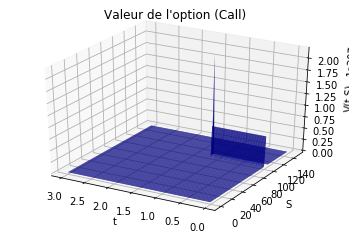

In [6]:
X, Y = np.meshgrid(Tmesh, Smesh)
print(Tmesh.shape)
print(Smesh.shape)
print(u.shape)
ax = plt.axes(projection='3d')
plt.gca().invert_xaxis()
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_zlabel('V(t,S)')
ax.plot_surface(X, Y, u.T, rstride=1, cstride=1, cmap='jet')
ax.set_title("Valeur de l'option (Call)")

IndexError: index 99 is out of bounds for axis 1 with size 80

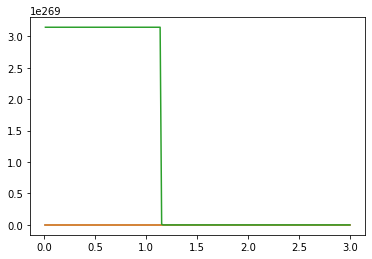

In [7]:
plt.plot(Tmesh, u[:,0], label='S = 0')
plt.plot(Tmesh, u[:,9], label='S = 10')
plt.plot(Tmesh, u[:,39], label='S = 40')
plt.plot(Tmesh, u[:,99], label='S = 100')

plt.xlabel('Temps')
plt.ylabel('V(t)')
plt.legend()
plt.title('Variation 1D (Call)')
plt.show()